In [25]:
#hide
# Import time!
from loguru import logger
from rich.logging import RichHandler

# Logging setup
logger.configure(
    handlers=[
        {
            "sink": RichHandler(
                log_time_format="%Y-%m-%d %X",
                rich_tracebacks=True,
                show_path=False,
                tracebacks_width=200,
            ),
            "format": "{message}",
            "level": "DEBUG",
        }
    ]
)

[2]

In [26]:
from pathlib import Path
titanic_data_path = Path('./titanic/')

In [27]:
# Settings to stop wrapping of screen
import torch
import numpy as np
import pandas as pd

np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [28]:
train_df = pd.read_csv(titanic_data_path / 'train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
modes = train_df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [31]:
train_df.fillna(modes, inplace=True)

In [32]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
train_df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

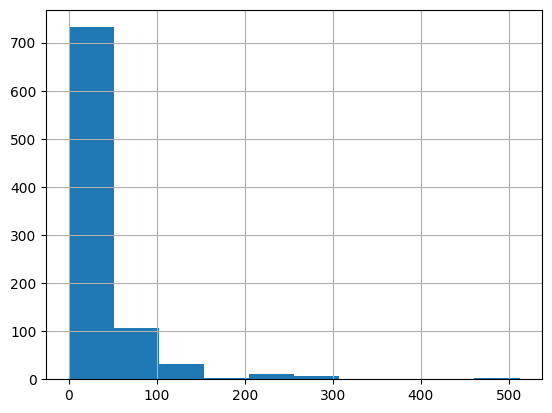

In [34]:
train_df['Fare'].hist()

In [35]:
train_df['LogFare'] = np.log(train_df['Fare'] + 1)

<Axes: >

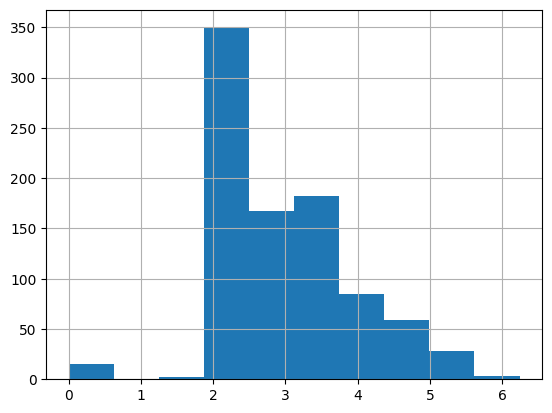

In [36]:
train_df['LogFare'].hist()

In [37]:
pclasses = sorted(train_df.Pclass.unique())
pclasses

[1, 2, 3]

In [38]:
train_df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [39]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Pclass', 'Embarked'], dtype=float)
train_df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [40]:
added_cols = ['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
train_df[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
from torch import tensor
t_dep = tensor(train_df.Survived)

In [42]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols
train_df[indep_cols]

,Age,SibSp,Parch,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,4.280593,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0,0,2.188856,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,3.990834,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0,0,2.202765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.639057,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
887,19.0,0,0,3.433987,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,24.0,1,2,3.196630,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,26.0,0,0,3.433987,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [43]:
t_indep = tensor(train_df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [44]:
t_indep.shape

torch.Size([891, 12])

In [45]:
# Settings up a linear model

torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff) - 0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [46]:
t_indep * coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.0000,  -0.3147,   0.0000

From the output above, we need to see if we can normalise the age row, as that's overpowering the rest of the values

In [47]:
values, indices = t_indep.max(dim=0)
values, indices

(tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000]),
 tensor([630, 159, 678, 258,   1,   0,   1,   9,   0,   1,   5,   0]))

In [48]:
t_indep = t_indep / values
t_indep

tensor([[0.2750, 0.1250, 0.0000, 0.3381, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000, 0.6859, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000, 0.3507, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4375, 0.1250, 0.0000, 0.6395, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.4375, 0.0000, 0.0000, 0.3530, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.3000, 0.0000, 0.0000, 0.3600, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.6750, 0.0000, 0.0000, 0.6358, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        ...,
        [0.3125, 0.0000, 0.0000, 0.3342, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4875, 0.0000, 0.8333, 0.5456, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.3375, 0.0000, 0.0000, 

In [49]:
t_indep * coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [50]:
predictions = (t_indep * coeffs).sum(axis=1)

In [52]:
predictions[:10]

tensor([ 0.1412, -0.5725,  0.1494,  0.2571,  0.0453, -0.0448,  0.0792,  0.2961,  0.2128, -0.5770])

In [53]:
loss = torch.abs(predictions - t_dep).mean()
loss

tensor(0.5200)

In [54]:
def calculate_predictions(coeffs, indeps): return (indeps * coeffs).sum(axis=1)
def calculate_loss(coeffs, indeps, deps): return torch.abs(calculate_predictions(coeffs, indeps) - deps).mean()

# Doing gradient descent step

In [55]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [56]:
loss = calculate_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5200, grad_fn=<MeanBackward0>)

In [57]:
loss.backward()

In [58]:
coeffs.grad

tensor([-0.0483,  0.0118, -0.0041, -0.0804, -0.1975,  0.1111, -0.1235, -0.0426,  0.0797, -0.1886, -0.0617,  0.1639])

In [59]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    logger.info(calculate_loss(coeffs, t_indep, t_dep))

2023-09-07 11:40:45 INFO     tensor(0.5056)

# Training the linear model

In [60]:
from fastai.data.transforms import RandomSplitter
train_split, val_split = RandomSplitter(seed=42)(train_df)

In [61]:
val_split

(#178) [303,778,531,385,134,476,691,443,386,128...]

In [62]:
train_indeps, val_indeps = t_indep[train_split], t_indep[val_split]
train_dep, val_dep = t_dep[train_split], t_dep[val_split]
len(train_indeps), len(val_indeps)


(713, 178)

In [63]:
def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * lr)

In [69]:
def one_epoch(coeffs, lr):
    loss = calculate_loss(coeffs, train_indeps, train_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f'{loss:.3f}', end='; ')

In [65]:
def init_coeffs(): return (torch.rand(n_coeff) - 0.5).requires_grad_()

In [67]:
def train_model(epoch_count=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for _ in range(epoch_count): one_epoch(coeffs, lr)
    return coeffs

In [70]:
coeffs = train_model(18, lr=0.02)
coeffs

0.518; 0.515; 0.510; 0.501; 0.491; 0.480; 0.467; 0.453; 0.435; 0.411; 0.388; 0.366; 0.346; 0.328; 0.310; 0.295; 0.288; 0.298; 

tensor([-0.2206,  0.1000,  0.2525,  0.1055,  0.3394, -0.4260,  0.8616,  0.4278,  0.2830,  0.1840,  0.3343,  0.1067], requires_grad=True)

# Measuring accuracy

In [71]:
predictions = calculate_predictions(coeffs, val_indeps)
results = val_dep.bool() == (predictions > 0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [72]:
results.float().mean()

tensor(0.7921)

In [73]:
def get_accuracy(coeffs): return (val_dep.bool() == (calculate_predictions(coeffs, val_indeps) > 0.5)).float().mean()
get_accuracy(coeffs)

tensor(0.7921)

# Using sigmoid

In [74]:
predictions[:28]

tensor([ 1.0792,  0.1617,  0.0105,  0.1318,  0.0842,  0.0796,  0.8826,  0.8414,  0.1731,  0.8481, -0.0875,  0.0766,  0.0495,  0.9274,
        -0.0960,  0.4743,  0.4191,  0.9029,  0.0568,  0.6821, -0.0655,  0.4440,  1.4118,  0.9092, -0.0562,  0.1921,  0.8232,  0.4274],
       grad_fn=<SliceBackward0>)

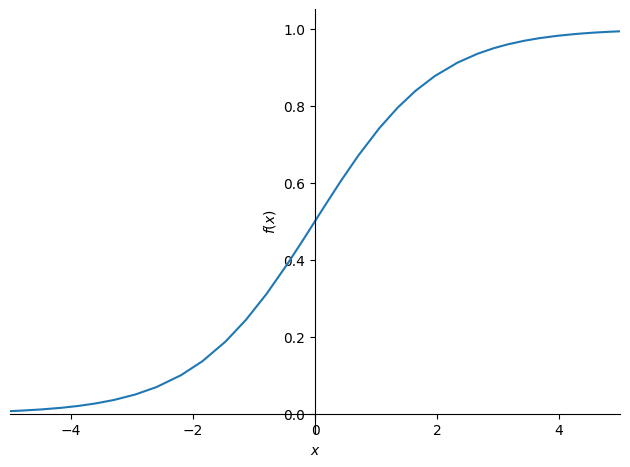

In [76]:
import sympy
sympy.plot('1 / (1 + exp(-x))', xlim=(-5, 5))

In [77]:
def calculate_predictions(coeffs, indeps): return torch.sigmoid((indeps * coeffs).sum(axis=1))

In [78]:
coeffs = train_model(lr=2)

0.503; 0.461; 0.391; 0.336; 0.306; 0.285; 0.265; 0.245; 0.228; 0.217; 0.210; 0.206; 0.205; 0.204; 0.204; 0.204; 0.204; 0.205; 0.205; 0.205; 0.205; 0.204; 0.204; 0.203; 0.202; 0.201; 0.200; 0.199; 0.197; 0.196; 

In [79]:
accuracy = get_accuracy(coeffs)
accuracy

tensor(0.8258)

In [80]:
(val_indeps * coeffs).sum(axis=1)

tensor([ 21.8975, -30.0529, -27.9389, -19.6750, -20.3506, -20.5479,   7.8810,  14.8256, -36.8329,   7.4655, -37.2160, -27.8882, -36.7033,
          5.1907, -37.3128, -16.8893, -17.3038,  15.0852, -20.4324,  -1.9309, -37.0512, -17.1173,  27.8901,  14.7271, -37.0000, -29.8715,
         -1.4027, -17.2416, -36.8799,   5.1860,  15.0109,  -1.9053, -36.9476, -37.1805,  21.7731,  -1.5863, -16.8546,  28.2186, -37.0457,
         -1.9866, -20.2887, -37.0457, -20.4025,  28.0829, -36.9628,  -1.7375, -36.5005, -36.9528, -30.0828,  -1.7952,  -9.7936, -36.9987,
        -36.9687, -37.1036, -20.4338, -20.5581, -30.0524, -37.2570, -36.9836, -36.9371,  -7.4279, -37.0918, -17.5773, -36.9880,  14.5483,
        -16.0714, -20.3299, -37.0323, -30.3478,  14.4844, -37.0927,   7.4934, -20.5374, -36.9986, -16.4614, -36.8897, -37.0457, -16.5192,
        -20.2263, -20.7642, -19.8393,  28.3697, -37.0305, -37.0751,  14.3072, -11.0367,  -6.9078,  19.2851,  23.9925, -20.3092, -37.2008,
        -37.0457,  28.2288, -28.06

In [81]:
val_indeps@coeffs

tensor([ 21.8975, -30.0529, -27.9389, -19.6750, -20.3506, -20.5479,   7.8810,  14.8256, -36.8329,   7.4655, -37.2160, -27.8882, -36.7033,
          5.1907, -37.3128, -16.8893, -17.3038,  15.0852, -20.4324,  -1.9309, -37.0512, -17.1173,  27.8901,  14.7271, -37.0000, -29.8715,
         -1.4027, -17.2416, -36.8799,   5.1860,  15.0109,  -1.9053, -36.9476, -37.1805,  21.7731,  -1.5863, -16.8546,  28.2186, -37.0457,
         -1.9866, -20.2887, -37.0457, -20.4025,  28.0829, -36.9628,  -1.7375, -36.5005, -36.9528, -30.0828,  -1.7953,  -9.7936, -36.9987,
        -36.9687, -37.1036, -20.4338, -20.5581, -30.0524, -37.2570, -36.9836, -36.9371,  -7.4279, -37.0918, -17.5773, -36.9880,  14.5483,
        -16.0714, -20.3299, -37.0323, -30.3478,  14.4844, -37.0927,   7.4934, -20.5374, -36.9986, -16.4614, -36.8897, -37.0457, -16.5192,
        -20.2263, -20.7642, -19.8393,  28.3697, -37.0305, -37.0751,  14.3072, -11.0367,  -6.9078,  19.2851,  23.9925, -20.3092, -37.2008,
        -37.0457,  28.2288, -28.06

# Adding matrix multiply to work

In [86]:
def calculate_predictions(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [83]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [84]:
train_dep = train_dep[:, None]
val_dep = val_dep[:, None]

In [87]:
coeffs = train_model(lr=2)

0.512; 0.469; 0.393; 0.331; 0.299; 0.280; 0.263; 0.245; 0.229; 0.217; 0.210; 0.206; 0.204; 0.203; 0.203; 0.203; 0.203; 0.203; 0.203; 0.204; 0.203; 0.203; 0.203; 0.202; 0.201; 0.200; 0.199; 0.198; 0.197; 0.196; 

# A neural network

In [88]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden) - 0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return (
        layer1.requires_grad_(),
        layer2.requires_grad_(),
        const.requires_grad_()
    )

In [89]:
import torch.nn.functional as F

def calculate_predictions(coeffs, indeps):
    l1, l2, const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [90]:
def update_coeffs(coeffs, lr):
    for layer in coeffs: layer.sub_(layer.grad * lr)

In [91]:
coeffs = train_model(lr=1.4)

0.544; 0.533; 0.511; 0.467; 0.392; 0.302; 0.252; 0.225; 0.209; 0.203; 0.201; 0.200; 0.196; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [92]:
get_accuracy(coeffs)

tensor(0.8258)

# Deep Learning

In [94]:
def init_coeffs():
    hiddens = [10, 10]
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[idx], sizes[idx+1]) - 0.3)/sizes[idx+1]*4 for idx in range(n - 1)]
    consts = [(torch.rand(1)[0] - 0.5)*0.1 for _ in range(n - 1)]

    for l in layers + consts: l.requires_grad_()
    return layers, consts

In [96]:
def calculate_predictions(coeffs, indeps):
    layers, consts = coeffs
    n = len(layers)
    res = indeps

    for idx, (layer, const) in enumerate(zip(layers, consts)):
        res = res@layer + const
        if idx != n-1: res = F.relu(res)

    return torch.sigmoid(res)

In [101]:
def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers + consts: layer.sub_(layer.grad * lr)

In [102]:
coeffs = train_model(lr=1.4)

0.514; 0.463; 0.348; 0.318; 0.208; 0.220; 0.224; 0.223; 0.217; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 

In [103]:
get_accuracy(coeffs)

tensor(0.7921)